In [13]:
# Importing library:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [14]:
# Loading the data:

data = pd.read_csv("/kaggle/input/facial-expression-recognitionferchallenge/fer2013/fer2013/fer2013.csv")

In [15]:
# Displaying data:

data.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [16]:
# Exploring data types present in the dataset:

data.dtypes

emotion     int64
pixels     object
Usage      object
dtype: object

In [17]:
# Checking for null values:

data.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [18]:
# Checking for duplicate values:

data.duplicated().sum()

1234

In [19]:
# Displaying the usage of dataset (training purpose / testing purpoes):

data.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [20]:
# Unique values in the emotion column:

data.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [21]:
# Displaying the count of emotion:

data.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [22]:
# Plotting pie chart using ploty of emotion column:

emotion = data.emotion.value_counts()  # getting values

fig = px.pie(data,   
             values=emotion.values, 
             names=emotion.index, 
             title="Distribution of Emotion")  # plotting pie chart
fig.update_traces(textposition='inside', 
                  textinfo='percent+label')  # updating the pie chart info
fig.show()  # displaying chart

In [23]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

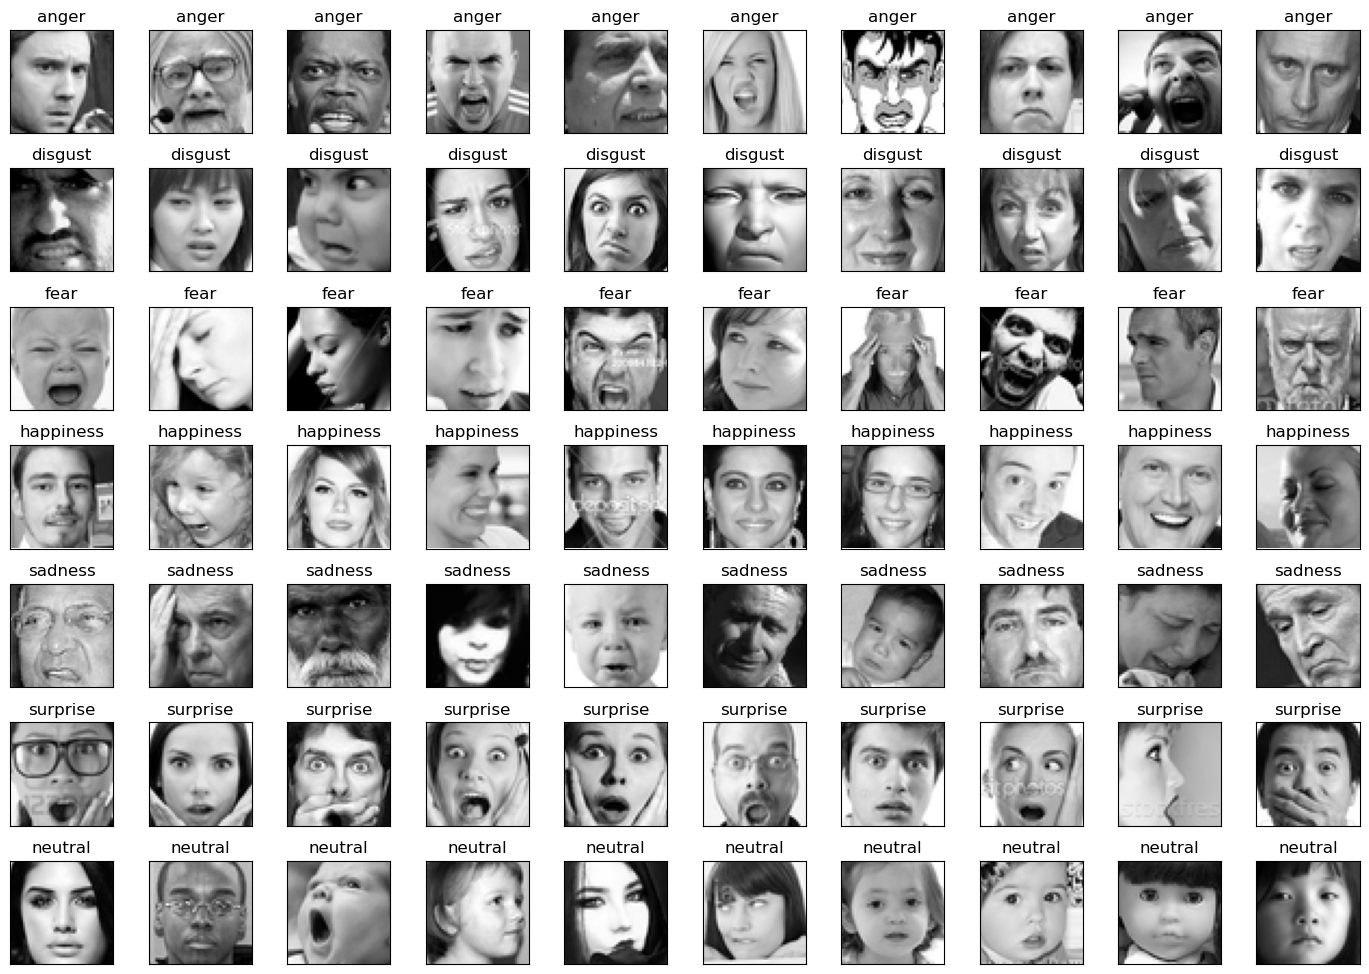

In [24]:
fig = plt.figure(figsize=(14, 14))

k = 0
unique_labels = sorted(data.emotion.unique())

for label in unique_labels:
    for j in range(10):
        px = np.array(data[data.emotion == label].pixels.iloc[k].split(' '), dtype='float32')
        px = px.reshape(48, 48)

        k += 1
        ax = fig.add_subplot(10, 10, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])

plt.tight_layout()
plt.show()


# Conclusion:

- We dont have images, instead we have pixels in csv file.

- We dont have null values.

- But we have few images which are repeated.

- Dataset is distributed in following format:
    - Training       28709
    - PublicTest      3589
    - PrivateTest     3589
    
- Labels: {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
    
- Label distribution:
    - 3:8989
    - 6:6198
    - 4:6077
    - 2:5121
    - 0:4953
    - 5:4002
    - 1:547
        
- So majority classes belongs to 3:Happy, 4:Sad and 6:Neutral.
            
- Least classes belongs to 1: disgust.

- He have to do preprocessing before training model and also apply data agumenatation for the data while training.